In [82]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

#### Read the Train and Test Data:

In [30]:
path = os.getcwd()
mypath = path + "/" + "\Titanic EDA\Data/"
train_dataset = pd.read_csv(mypath + "train.csv")
# test_dataset =pd.read_csv(mypath + "test.csv")

In [32]:
# Preview the Training Data:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Checking the features in our training dataset:
print("Feature in Training Data are:\n {}".format(train_dataset.columns))
print("Number of Feature in data_set are: {}".format(len(train_dataset.columns)))

Feature in Training Data are:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of Feature in data_set are: 12


In [42]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
print("Percentage of Values Missing in 'Age' are: %.2f"%(train_dataset["Age"].isnull().sum() / train_dataset.shape[0] * 100),"%")

Percentage of Values Missing in 'Age' are: 19.87 %


So nearly 20% data is missing in th 'Age' column and we can impute the data becuase its in reasoable amount. We are not going to impute the missing value with mean becuase it will add bias and attenuate the correlation of imputed feature with other varibales/features.

In [59]:
print("Percentage of Values Missing in 'Age' are: %.2f"%(train_dataset["Cabin"].isnull().sum() / train_dataset.shape[0] * 100),"%")

Percentage of Values Missing in 'Age' are: 77.10 %


In case of 'Cabin' a huge amount of data is missing ~78% so imputing this column would add unnessary information which will not make any sense at all.
So it would be fair if we drop that column.

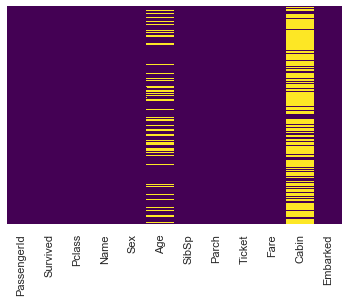

In [92]:
sns.heatmap(train_dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

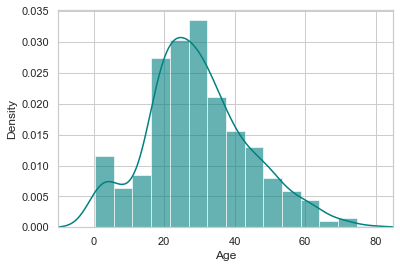

In [93]:
ax = train_dataset['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_dataset['Age'].plot(kind= 'density', color='teal')
ax.set(xlabel= "Age")
plt.xlim(-10, 85)
plt.show()

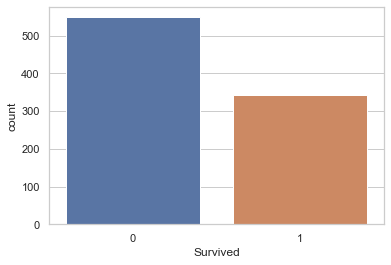

In [95]:
sns.countplot(x="Survived", data=train_dataset)

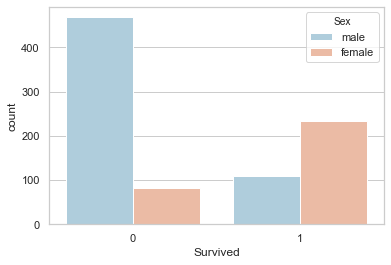

In [98]:
sns.countplot(x='Survived', hue='Sex', data=train_dataset, palette= 'RdBu_r')

As we can see that large number of male have'nt Survived and only considerably small women died.

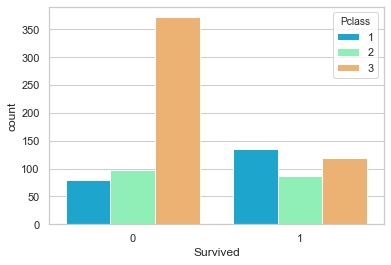

In [101]:
sns.countplot(x='Survived', hue='Pclass', data=train_dataset, palette= 'rainbow')

We can see that passenger class-3 have higher death count as compare to class-1 who are richers.

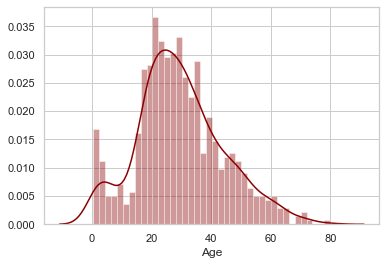

In [123]:
sns.distplot(train_dataset['Age'].dropna(), kde=True, bins=40, color='darkred')

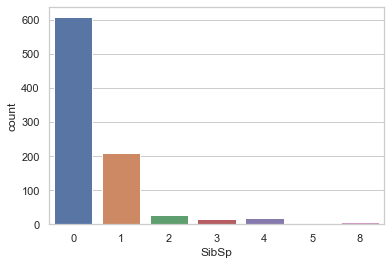

In [125]:
sns.countplot(x='SibSp', data=train_dataset)

This 'SibSp' feature tells how many persons aboard with their sibling and Spouse. And we can see that large number of people more than 600 people were single. "1" indicate that the person is with one Spouse/Sibling and so on.

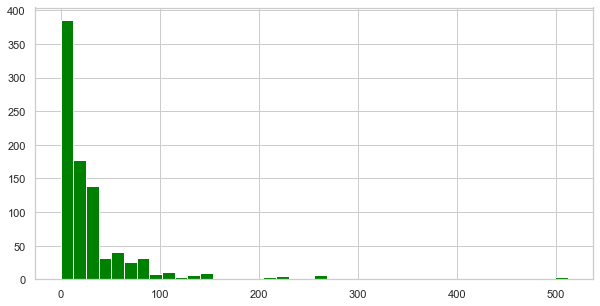

In [126]:
train_dataset['Fare'].hist(bins=40, color='green', figsize=(10,5))

We can see the average fare, the people who bought the tickets.

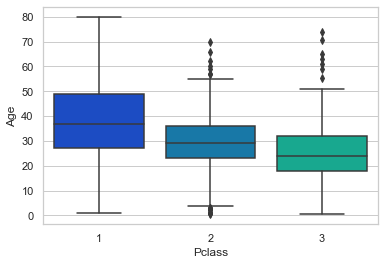

In [132]:
sns.boxplot(x='Pclass', y='Age', data=train_dataset, palette='winter')